In [ ]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable,lpDot
import numpy as np
# Modelo de Maximização
"""
OBS: todas as matrizes e vetores são np.array!
n = # de variáveis do problema
A = Matriz dos coeficientes das desigualdades <= de X, sem contar as restrições feitas com as funções objetivas
b = vetor de Ax<=b
coeficientes_fun_pri = Matriz de Coeficientes da função objetiva a ser otimizada
funcao_principal = Função a ser otimizada
num_funcao_restricao = numero de Funções que irão se tornar restrições
matriz_coeficientes_f_aux = Coeficientes de tais funções
epsilons = vetor dos epsilons
"""

def e_restrito(n,A,b,coeficientes_fun_pri,num_funcao_restricao,matriz_coeficientes_f_aux,epsilons):
    model = LpProblem(name="large-problem", sense=LpMaximize)

    # Tamanho do Problema
    #n  #int(input("Informe a dimensão do problema: "))

    # Neste trabalho será tratado apenas dos casos lineares com variáveis reais

    x = [LpVariable(name=f"x{i}", lowBound=0) for i in range(n)]
    rest1 = A.shape[0]
    # Criamos Uma lista que contêm todas as variáveis do problema.
    #A 
    #b
    for i in range(rest1):
        model += (lpDot(A[i], x) <= b[i], f"restrição {i}")

    # Funções Objetivas
    #coeficientes_fun_pri 
    funcao_principal = lpDot(coeficientes_fun_pri,x)
    model += funcao_principal
    #num_funcao_restricao  
    #matriz_coeficientes_f_aux 
    #epsilons 

    for i in range(num_funcao_restricao):
        model += (lpDot(matriz_coeficientes_f_aux[i], x) >= epsilons[i], f"restrição {rest1+i}")

    #print(model)

    status = model.solve()
    sol = np.zeros(n)
    for i in range(n):
        sol[i] = x[i].value()
    print(f"Solução: {sol}")
    sol = np.transpose(sol)
    value_func_aux = np.zeros(num_funcao_restricao)
    
    for i in range(num_funcao_restricao):
     value_func_aux[i] = np.dot(matriz_coeficientes_f_aux,sol)
    for i in range(num_funcao_restricao):
        print(f"O valor de f{i+1} é: {value_func_aux[i]}")
    print(f"status: {model.status}, {LpStatus[model.status]}")
    print(f"objective: {model.objective.value()}")

In [3]:
import pulp

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem += 2*(x+y) +1*y, "Z"

# Adição das restrições
lp_problem +=  x + 2*y <= 6, "Restrição_1"
lp_problem += x <= 2, "Restrição_2"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

Status: Optimal
Valor de x = 2.0
Valor de y = 2.0
Valor da função objetivo Z = 10.0


In [6]:
import pulp

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem += y-x, "Z"

# Adição das restrições
lp_problem +=  x + 4*y <= 20, "Restrição_1"
lp_problem += 2*x +y <= 12, "Restrição_2"
lp_problem += x <= 5, "Restrição_3"
lp_problem += x +y >= 6, "Restrição_4"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

Status: Optimal
Valor de x = 1.3333333
Valor de y = 4.6666667
Valor da função objetivo Z = 3.3333334000000003


In [69]:
import pulp

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem +=  x + y, "Z"

# Adição das restrições
lp_problem +=  x + 4*y <= 20, "Restrição_1"
lp_problem += 2*x +y <= 12, "Restrição_2"
lp_problem += x<= 5, "Restrição_3"
lp_problem += y-x >= 0, "Restrição_4"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

Status: Optimal
Valor de x = 4.0
Valor de y = 4.0
Valor da função objetivo Z = 8.0


In [3]:
print(type(x))

<class 'pulp.pulp.LpVariable'>


In [2]:

# Criação do problema de maximização
lp_problem = pulp.LpProblem("Exemplo_PL", pulp.LpMaximize)

# Definição das variáveis
x = pulp.LpVariable("x", lowBound=0,cat='Float')  # x >= 0
y = pulp.LpVariable("y", lowBound=0,cat='Float')  # y >= 0

# Adição da função objetivo
lp_problem += 1*(x) +5*y, "Z"

# Adição das restrições
lp_problem +=  x + 4*y <= 20, "Restrição_1"
lp_problem += 4*x + y <= 20, "Restrição_2"

# Resolução do problema
lp_problem.solve()

# Exibição dos resultados
print("Status:", pulp.LpStatus[lp_problem.status])
print("Valor de x =", pulp.value(x))
print("Valor de y =", pulp.value(y))
print("Valor da função objetivo Z =", pulp.value(lp_problem.objective))

NameError: name 'pulp' is not defined

In [2]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# Crie o problema
model = LpProblem(name="large-problem", sense=LpMaximize)

# Inicialize as variáveis de decisão
x = [LpVariable(name=f"x{i}", lowBound=0) for i in range(25)]

# Adicione as restrições ao problema
# Esta é uma restrição de exemplo, você pode adicionar suas próprias restrições
model += (lpSum(x[i] for i in range(25)) <= 100, "restrição 1")

# Adicione a função objetivo ao problema
model += lpSum(x[i] for i in range(25))

# Resolva o problema
status = model.solve()

for i in range(25):
    print(f"{x[i].name}: {x[i].value()}")

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")


x0: 100.0
x1: 0.0
x2: 0.0
x3: 0.0
x4: 0.0
x5: 0.0
x6: 0.0
x7: 0.0
x8: 0.0
x9: 0.0
x10: 0.0
x11: 0.0
x12: 0.0
x13: 0.0
x14: 0.0
x15: 0.0
x16: 0.0
x17: 0.0
x18: 0.0
x19: 0.0
x20: 0.0
x21: 0.0
x22: 0.0
x23: 0.0
x24: 0.0
status: 1, Optimal
objective: 100.0


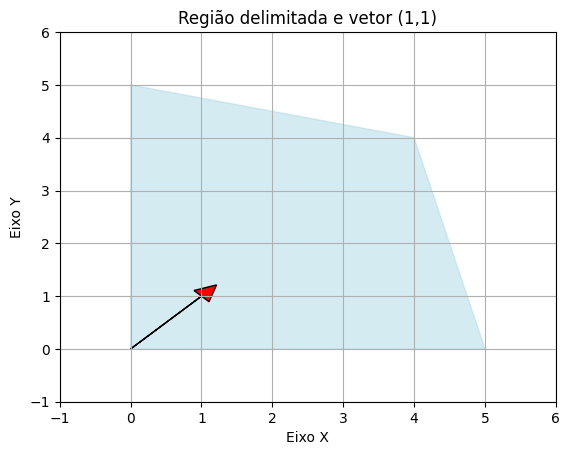

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Pontos para delimitar a região
points = np.array([[0, 0], [0, 5], [4, 4], [5, 0]])

# Coordenadas x e y dos pontos
x = points[:, 0]
y = points[:, 1]

# Plotando a região
plt.fill(x, y, color='lightblue', alpha=0.5)  # Preenche a área delimitada pelos pontos

# Adicionando a seta representando o vetor (1,1)
plt.arrow(0, 0, 1, 1, head_width=0.3, head_length=0.3, fc='red', ec='black')  # Define a seta

# Configurações adicionais do gráfico
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Região delimitada e vetor (1,1)')

# Mostra o gráfico
plt.grid(True)
plt.show()

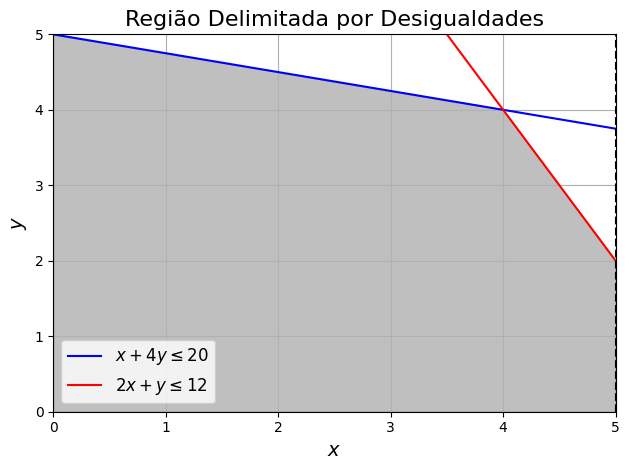

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define as desigualdades
x = np.linspace(0, 5, 100)
y1 = (20 - x) / 4
y2 = 12 - 2*x

# Plotagem das desigualdades
plt.fill_between(x, 0, np.minimum(y1, y2), color='gray', alpha=0.5)
plt.plot(x, y1, 'b', label=r'$x + 4y \leq 20$')
plt.plot(x, y2, 'r', label=r'$2x + y \leq 12$')

# Linha vertical pontilhada
plt.axvline(x=5, linestyle='--', color='k')

# Configurações do gráfico
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.title(r'Região Delimitada por Desigualdades', fontsize=16)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(np.arange(0, 6, step=1))
plt.yticks(np.arange(0, 6, step=1))
plt.legend(fontsize=12)
plt.grid(True)

# Habilitando o modo LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [5]:
#Estudo de Programação Orientada a Objetos - POO
"""
Classe: Modelo que representa o objeto do 'mundo real', de forma computacional;
Atributo: Caracteristicas do objeto;
Método: Comportamento do Objeto(Funções);
Construtor: Método para criar objetos;
Objeto: Instância da Classe.
"""
num =10
name = 'oi'
class Produto:
    pass

ps4 = Produto()

print(num)
print(type(num))

print(name)
print(type(name))

print(ps4)
print(type(ps4))

# É possível ver que o numero e string são classes
# O ps4 mostra o endereço de memória. Criamos com ele um novo tipo de dado chamado de produto.


10
<class 'int'>
oi
<class 'str'>
<class '__main__.Produto'>


# Classes

In [6]:
"""
Imagine que você queira montar um sistema para automatizar o controle de lâmpadas da sua casa. 
classe pode conter: 
-atributos da lampada(cor, luminosidade,...) 
-Métodos da lâmpada/comportamento no sistema (ligar e desligar)
...
Obs:
-pass - quando temos um bloco ainda não implementado.
- por convenção utilizamos o nome da nossa classe com começo maiusculo ou composta junta (ContaCorrente) (não obrigatório)!
- Quando estamos planejando um software e definimos as classes do sistema, chamamos estes objetos mapeados de entidade.
"""


class Lampada:
    pass

lamp = Lampada()
print(type(lamp))

<class '__main__.Lampada'>


# Atributos

In [9]:
""" 
Atributos representam as caracteristicas de um objeto.
Tipos de Atributos:
     -Atributos de Instacia
     -Atributos de Classe
     -Atributos Dinâmicos

     
# Atributos de Instância: São atributos declarados dentro do método construtor.
-Método construtor: Método especial para a construção do objeto.
-self: Objeto que esta executando o metodo
"""
# Classes com atributos de instância públicos:
class Lampada():
    def __init__(self,voltagem,cor):
        self.voltagem = voltagem
        self.cor = cor
        self.ligada = False

class ContaCorrente:
    def __init__(self,numero,limite,saldo):
        self.numero = numero
        self.limite = limite
        self.saldo = saldo

class Produto:
    def __init__(self,nome,descricao,valor):
        self.nome = nome
        self.descricao = descricao
        self.valor = valor

class Usuario:
    def __init__(self,nome,email,senha):
        self.nome=nome
        self.email=email
        self.senha=senha
#self é convencao
"""
class Teste():        
    def __init__(batata,nome,idade):
        batata.nome = nome
"""
#Atributos Públicos e Privados:
"""
# Atributos privados podem somente ser utilizados na classe no qual foram criados.
# Atributos publicos podem ser acessado no projeto
# Em python, por convenção, todo atributo de uma classe é público.
# Para declarar um atributo privado, devemos utilizar " __ " duplo underscore no inicio de seu nome
"""

# Classes de instância com atributos privados:

class Acesso:
    def __init__(self,email,senha):
        self.__email=email
        self.__senha=senha

# Obs: isso é uma convenção,o python não impede voce de acessar os atributos privados, mas para ter acesso esse nome não funciona.
        #voce teria que buscar o nome secreto para ter acesso

# Atributos de instancia significa que ao criarmos objetos/instancias de uma classe, todas as instancias terao acesso a estes atributos.
        
        

In [11]:
# Atributo de Classe
""" 
São declarados diretamente na classe, ou seja, fora do construtor. Geralmente ja inicializamos um valor,
e este é compartilhado entre todas as instâncias da classe.
"""

class Produto:
    imposto =1.05
    contador =0
    def __init__(self,nome,descricao,valor):
        self.id = Produto.contador + 1
        self.nome = nome
        self.descricao = descricao
        self.valor = (valor*Produto.imposto)
        Produto.contador = self.id
p1 = Produto('Ps4','video game',2300)
p2 = Produto('Xbox 360','video game',1100)

print(p1.valor)
print(p2.valor)
print(p1.id)
print(p2.id)

2415.0
1155.0
1
2


In [15]:
# Atributos dinâmicos

""" 
Pode ser criado em tempo de execução

OBS: O atributo dinâmico é exclusivo da instância que o criou
"""


class Produto:
    imposto =1.05
    contador =0
    def __init__(self,nome,descricao,valor):
        self.id = Produto.contador + 1
        self.nome = nome
        self.descricao = descricao
        self.valor = (valor*Produto.imposto)
        Produto.contador = self.id
p1 = Produto('Ps4','video game',2300)
p2 = Produto('Arroz','Alimento',6.59)

# Criando atributo em tempo de execução

p2.peso = '5Kg'

print(f'Produto: {p2.nome}, Peso: {p2.peso}')
#print(f'Produto: {p1.nome}, Peso: {p1.peso}') ---> erro, pois não existe o atributo peso em p1

# Deletando atributos

print(p1.__dict__) # __dict_ retorna um dicionário
print(p2.__dict__)

del p2.peso #deleta atributo dinâmico
del p2.valor #deleta atributo não dinâmico
print(p1.__dict__) 
print(p2.__dict__)





Produto: Arroz, Peso: 5Kg
{'id': 1, 'nome': 'Ps4', 'descricao': 'video game', 'valor': 2415.0}
{'id': 2, 'nome': 'Arroz', 'descricao': 'Alimento', 'valor': 6.9195, 'peso': '5Kg'}
{'id': 1, 'nome': 'Ps4', 'descricao': 'video game', 'valor': 2415.0}
{'id': 2, 'nome': 'Arroz', 'descricao': 'Alimento'}
